#            Lead Scoring Case Study - Visalakshi G & Ramana Kishore G 

### Business Problem:<BR>
<font size=3 color = 'blue'>
    X Education ,an education company, sells online courses to industry professionals
Many interested professionals land on their website.The company markets its courses on several websites like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
    When these people fill up a form providing their email address or phone number, they are classified to be a lead. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
     To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. 
<BR>    
</font>

### Objective:<BR>
<font size=3 color='blue'>
It is required to categorize or cluster the leads as hot leads and cold leads. This is to be done by analysing past
data provided by X Education Company. The Company's employee will then focus on communicating effictively with the 
hot leads so that most of them actually convert. We have been given a target of 80% convertion rate, and thus, in 
order to achieve that, we must accurately categorize the leads.<BR>
</font>

### Data<BR>
<font size=3 color='blue'>
   We have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.
</font><BR>

In [386]:
# Importing modules required for analysis
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print('seaborn version\t:',sns.__version__)

import os
%matplotlib inline
pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.set_option('display.max_columns', 100) # to display all columns,set the max columns to high number

from IPython.display import display

numpy version	: 1.18.1
pandas version	: 1.0.1
seaborn version	: 0.10.0


### Understanding the data

#### Load and Read the data

In [387]:
f='Leads.csv' # Application Dataset file given for Case study

dir_path = os.path.dirname(os.path.realpath(f))   #Find file location

print('\033[1m'+'Application Dataset file location on local machine: '+dir_path) #write dataset location

#Read the application data set and view the header data
df = pd.read_csv(f)
df.head()

Application Dataset file location on local machine: /home/visali/dds/ml/Lead+Scoring+Case+Study/Lead Scoring Assignment


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [388]:
#Check the data set size
print('Dataset has ',df.shape[0],' rows and ',df.shape[1],'columns')

Dataset has  9240  rows and  37 columns


In [389]:
#Check the features
print(df.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [390]:
#Check the data types
print(df.dtypes)

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [391]:
#Check the data spread
pd.options.display.max_columns = None
print(df.describe(include='all'))

                                 Prospect ID  Lead Number  \
count                                   9240      9240.00   
unique                                  9240          nan   
top     73395da6-c91c-43ee-8d29-bc2a3436ee5b          nan   
freq                                       1          nan   
mean                                     NaN    617188.44   
std                                      NaN     23406.00   
min                                      NaN    579533.00   
25%                                      NaN    596484.50   
50%                                      NaN    615479.00   
75%                                      NaN    637387.25   
max                                      NaN    660737.00   

                    Lead Origin Lead Source Do Not Email Do Not Call  \
count                      9240        9204         9240        9240   
unique                        5          21            2           2   
top     Landing Page Submission      Google        

In [392]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Cleaning and EDA

#### Check Data imbalance

In [393]:
#Understand the values (excluding columns with unique values - Prospect ID and Lead Number) to see if there is any imbalance in the data
df_copy=df.iloc[:,2:]

for col in df_copy:
    print(df_copy[col].value_counts(), '\n')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
youtubechannel          1
blog                    1
WeLearn                 1
testone                 1
NC_EDM                  1
welearnblog_Home        1
Name: Lead Source, dtype: int64 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

0    5679
1    3561
Name: Converted, dtype: int64 

0.00      2189
2.00      1680
3.00      1306
4.00      11

15.00    1759
18.00    1071
16.00     599
17.00     579
20.00     308
19.00     245
14.00     226
13.00     204
12.00      22
11.00       9
Name: Asymmetrique Profile Score, dtype: int64 

No    9240
Name: I agree to pay the amount through cheque, dtype: int64 

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64 

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64 



**Inference - Features which are highly imbalanced :<BR>
Magazine , Newspaper Article , X Education Forums , Newspaper , Digital Advertisement , Through Recommendations ,Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque, What matters most to you in choosing a course , Search,Do Not Call,Do Not Email - Country, What is your current occupation**

In [394]:
#Remove columns which are highly imbalanced since they do not add any value to the analysis.
#Prepare the list of columns to be dropped.
drop_cols = ['Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque', 'Do Not Call', 'Do Not Email','Search', 
                'What matters most to you in choosing a course','Country','What is your current occupation']
print('Columns to be dropped:\n',drop_cols)

Columns to be dropped:
 ['Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Do Not Call', 'Do Not Email', 'Search', 'What matters most to you in choosing a course', 'Country', 'What is your current occupation']


In [395]:
#Check for duplicated data
df[df.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


**No duplicates in the dataset.**

In [396]:
#Since no duplicates, add Prospect ID and Lead Number can be dropped.
drop_cols.extend(['Prospect ID','Lead Number'])
print(drop_cols)

['Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Do Not Call', 'Do Not Email', 'Search', 'What matters most to you in choosing a course', 'Country', 'What is your current occupation', 'Prospect ID', 'Lead Number']


In [397]:
# Calculating % of of Non Converted and Converted Leads present in the Dataset

print(round(100*df['Converted'].value_counts(normalize=True),3).sort_values(ascending = False))

0   61.46
1   38.54
Name: Converted, dtype: float64


Text(0, 0.5, '% of Conversion')

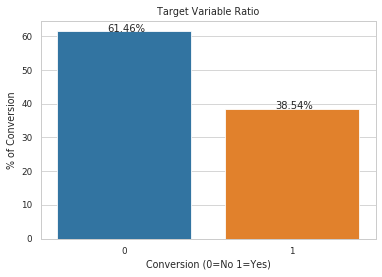

In [398]:
# Plot representing the Imbalance Percentage in the DataFrame

ax = sns.barplot(x="Converted", y="Converted",data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

for p in ax.patches:
       ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

plt.title('Target Variable Ratio')
plt.xlabel('Conversion (0=No 1=Yes)')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')


**Infererence:
    Target variable is having a 62:38 ratio and seems to be properly balanced with respect to the conversion ratio.**

### Data Cleaning & EDA

**During initial analysis (value_counts) , we observed that many variables are having 'Select' as the categorical values. These are values which customer has clearly missed to add.Hence, we will consider them as NULL values. Let us convert all 'Select' values to 'NaN' and treat them.**

In [399]:
#Check the columns which contain 'Select' word and replace it with NaN
val = df.isin(['Select']).any()
Selectcols = val.index[val].tolist()
print('Columns with Select in the column:\n',Selectcols)

Columns with Select in the column:
 ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [400]:
for i in Selectcols:
    print(df[i].value_counts(),'\n\n')

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64 


Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sourc

In [401]:
#Replace 'Select' with Null value
df = df.replace('Select',np.NaN)

In [402]:
#Check the columns after replacing 'Select' with Null
for i in Selectcols:
    print(df[i].value_counts(),'\n\n')

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64 


Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                

In [403]:
#Check Null values percentage in each column
print(round(100*(df.isnull().sum()/len(df.index)), 2))

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

**There are columns with more than 25% null values.**

In [404]:
#Drop columns with more than 40% missing values
cols = df.columns
print("Dropped columns with more than 40% null values: ")
for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 40):
        df.drop(i, 1, inplace = True)
        print(i+',',end=' ')
        

Dropped columns with more than 40% null values: 
How did you hear about X Education, Lead Quality, Lead Profile, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, 

In [405]:
#Check Null values percentage in each column after dropping columns with more than 40% nulls
print(round(100*(df.isnull().sum()/len(df.index)), 2))

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [406]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Categorical Column Analysis

In [407]:
#List out Categorical columns
cols = df.select_dtypes(include=['object']).columns
print(cols)

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [408]:
#See the columns which are already in drop list prepared so that they need not be analysed
print(drop_cols)

['Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Do Not Call', 'Do Not Email', 'Search', 'What matters most to you in choosing a course', 'Country', 'What is your current occupation', 'Prospect ID', 'Lead Number']


#### Lead Origin column analysis

In [409]:
#Check the values of the column
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

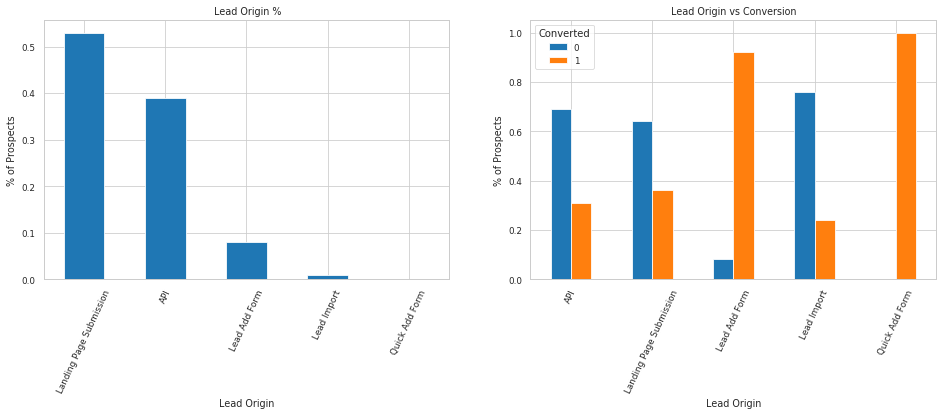

In [410]:
# Plotting with self as well as target variable

plt.figure(figsize=(16, 10))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Lead Origin'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Lead Origin %')
plt.xlabel('Lead Origin')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Lead Origin'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Lead Origin vs Conversion')
plt.xlabel('Lead Origin')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()


In [411]:
# Checking unique value counts 

print(round(df['Lead Origin'].value_counts(normalize=True),3))

Landing Page Submission   0.53
API                       0.39
Lead Add Form             0.08
Lead Import               0.01
Quick Add Form            0.00
Name: Lead Origin, dtype: float64


In [412]:
#Check the conversion rate
print(round(pd.crosstab(df['Lead Origin'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))

Converted                  0    1
Lead Origin                      
API                     0.69 0.31
Landing Page Submission 0.64 0.36
Lead Add Form           0.08 0.92
Lead Import             0.76 0.24
Quick Add Form          0.00 1.00


**Inference:<BR>
 Univariate Analysis : ~53% of the Lead Origin is from 'Landing Page Submission' followed by ~39% from API.<BR>
 Bivariate Analysis :  'Landing Page Submission' has 36% of Conversion and 'API' has 31% of Conversion.**<BR>

#### Lead Source Column Analysis

In [413]:
#Check the value count if Lead Source column
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
youtubechannel          1
blog                    1
WeLearn                 1
testone                 1
NC_EDM                  1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [414]:
#Convert less frequent values into 'Others'
df['Lead Source'] = df['Lead Source'].replace('google','Google')
# Imputing Null with Others, as it is generally Unknown sources
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')

df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home','WeLearn','blog','Pay per Click Ads','testone','NC_EDM','Live Chat','Facebook','Social Media'] ,'Others') 


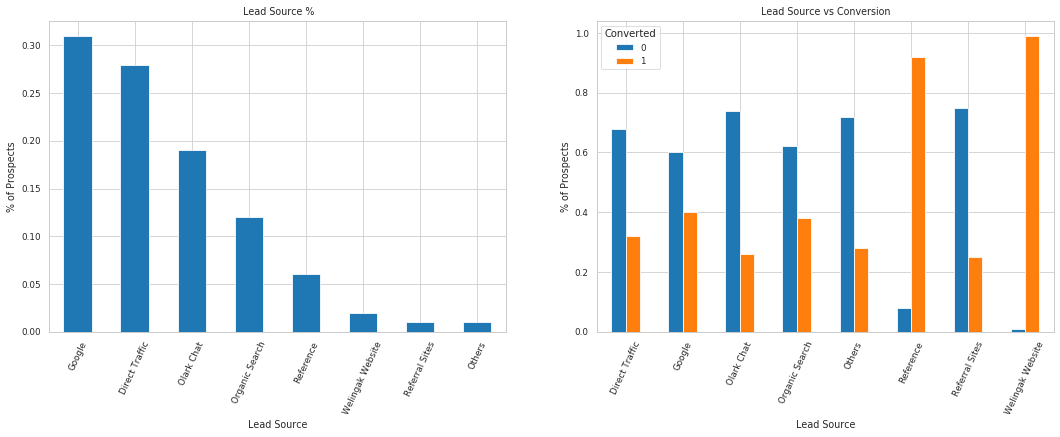

In [415]:
# Plotting vs self and target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Lead Source'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Lead Source %')
plt.xlabel('Lead Source')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Lead Source'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Lead Source vs Conversion')
plt.xlabel('Lead Source')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [416]:
# Checking unique value counts 

print(round(df['Lead Source'].value_counts(normalize=True),3).sort_values(ascending = False))

Google             0.32
Direct Traffic     0.28
Olark Chat         0.19
Organic Search     0.12
Reference          0.06
Welingak Website   0.01
Referral Sites     0.01
Others             0.01
Name: Lead Source, dtype: float64


In [417]:
#Check the conversion rate
print(round(pd.crosstab(df['Lead Source'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))

Converted           0    1
Lead Source               
Direct Traffic   0.68 0.32
Google           0.60 0.40
Olark Chat       0.74 0.26
Organic Search   0.62 0.38
Others           0.72 0.28
Reference        0.08 0.92
Referral Sites   0.75 0.25
Welingak Website 0.01 0.99


**Inferences:<BR>
Univariate Analysis : ~31% of the Lead Source is from 'Google' followed by ~28% from 'Direct Traffic' <BR>
Bivariate Analysis : 'Google' as a Lead Source has 40% of Conversion and 'Direct Traffic' has 32% of Conversion.**<BR>

#### Last Activity Column Analysis

In [418]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [419]:
# Replacing less frequent values
# Imputing Null with Others, as it is generally Unknown sources
df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Email Opened')

# Merging low frequency items to Others
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others')

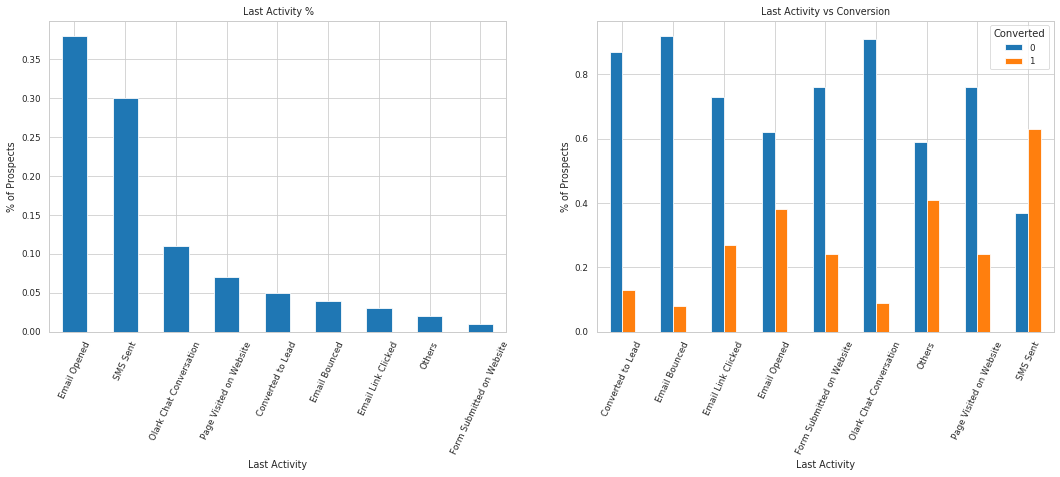

In [420]:
# Plotting analysis of variable with self and target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Last Activity'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Last Activity %')
plt.xlabel('Last Activity')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Last Activity'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Last Activity vs Conversion')
plt.xlabel('Last Activity')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')
plt.subplots_adjust(hspace=.1)
plt.show()

In [421]:
# Checking unique value counts 
print(round(df['Last Activity'].value_counts(normalize=True),3).sort_values(ascending = False))

Email Opened                0.38
SMS Sent                    0.30
Olark Chat Conversation     0.10
Page Visited on Website     0.07
Converted to Lead           0.05
Email Bounced               0.04
Email Link Clicked          0.03
Others                      0.02
Form Submitted on Website   0.01
Name: Last Activity, dtype: float64


In [422]:
#Check the conversion rate
print(round(pd.crosstab(df['Last Activity'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))

Converted                    0    1
Last Activity                      
Converted to Lead         0.87 0.13
Email Bounced             0.92 0.08
Email Link Clicked        0.73 0.27
Email Opened              0.62 0.38
Form Submitted on Website 0.76 0.24
Olark Chat Conversation   0.91 0.09
Others                    0.59 0.41
Page Visited on Website   0.76 0.24
SMS Sent                  0.37 0.63


**Inferences :<BR>
Univariate Analysis : ~38% of the Last Activity is from 'Email Opened' followed by ~30% from 'SMS Sent' <BR> Bivariate Analysis : 'Email Opened' as a Last Activity has 36% of Conversion and 'SMS Sent' has 63% of Conversion.**<BR>

#### Specialization column analysis

In [423]:
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

**Merging less frequent values of 'Specialization' to 'Others' category; Impute NULL values as 'Others'**


In [424]:
# Imputing Null with Others, as it is generally Unknown sources
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

# Merging low frequency items to Others
df['Specialization'] = df['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')

df['Specialization'].value_counts()

Others                               3550
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Name: Specialization, dtype: int64

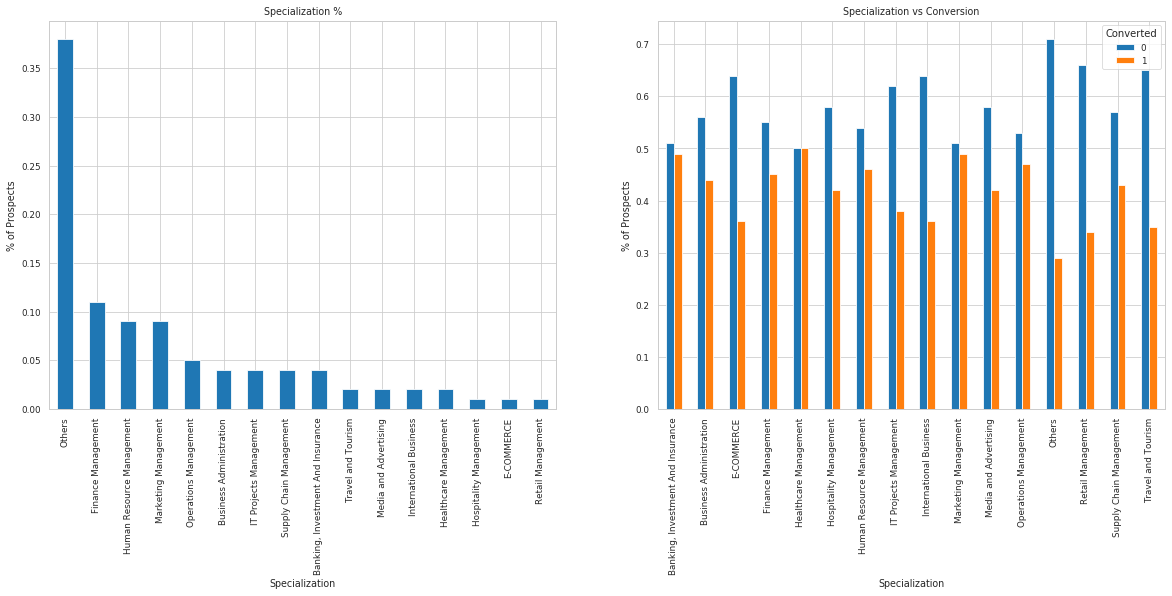

In [425]:
# Plotting Specialization w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Specialization'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Specialization %')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Specialization'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Specialization vs Conversion')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()


In [426]:
# Checking unique value counts 

print(round(df['Specialization'].value_counts(normalize=True),3).sort_values(ascending = False))

Others                              0.38
Finance Management                  0.11
Human Resource Management           0.09
Marketing Management                0.09
Operations Management               0.05
Business Administration             0.04
IT Projects Management              0.04
Supply Chain Management             0.04
Banking, Investment And Insurance   0.04
Media and Advertising               0.02
Travel and Tourism                  0.02
International Business              0.02
Healthcare Management               0.02
E-COMMERCE                          0.01
Hospitality Management              0.01
Retail Management                   0.01
Name: Specialization, dtype: float64


In [427]:
#Check the conversion rate
print(round(pd.crosstab(df['Specialization'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))

Converted                            0    1
Specialization                             
Banking, Investment And Insurance 0.51 0.49
Business Administration           0.56 0.44
E-COMMERCE                        0.64 0.36
Finance Management                0.55 0.45
Healthcare Management             0.50 0.50
Hospitality Management            0.58 0.42
Human Resource Management         0.54 0.46
IT Projects Management            0.62 0.38
International Business            0.64 0.36
Marketing Management              0.51 0.49
Media and Advertising             0.58 0.42
Operations Management             0.53 0.47
Others                            0.71 0.29
Retail Management                 0.66 0.34
Supply Chain Management           0.57 0.43
Travel and Tourism                0.65 0.35


**Inferences: <BR>
Univariate Analysis : ~40% of the Specialization is from 'Others' category, followed by ~10% from 'Finance Management'.<BR>
Bivariate Analysis : 'Healthcare Management' has highest Conversion of 50% followed by 'Banking,Investment and Insurance' with a Conversion of 49%.**<BR>

#### Tags column Analysis

In [428]:
#Checking unique value counts 

df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

**Merging less frequent values of 'Tags' to 'Others' category and impute null values with 'Others'**

In [429]:
# Imputing Null with Others, as it is generally Unknown sources
df['Tags'] = df['Tags'].replace(np.nan, 'Others')

# Merging low frequency items to Others
df['Tags'] = df['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
                                     'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
                                     'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
                                     'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)','Closed by Horizzon'
                                     ], 'Others')

df['Tags'].value_counts()

Others                                 4987
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

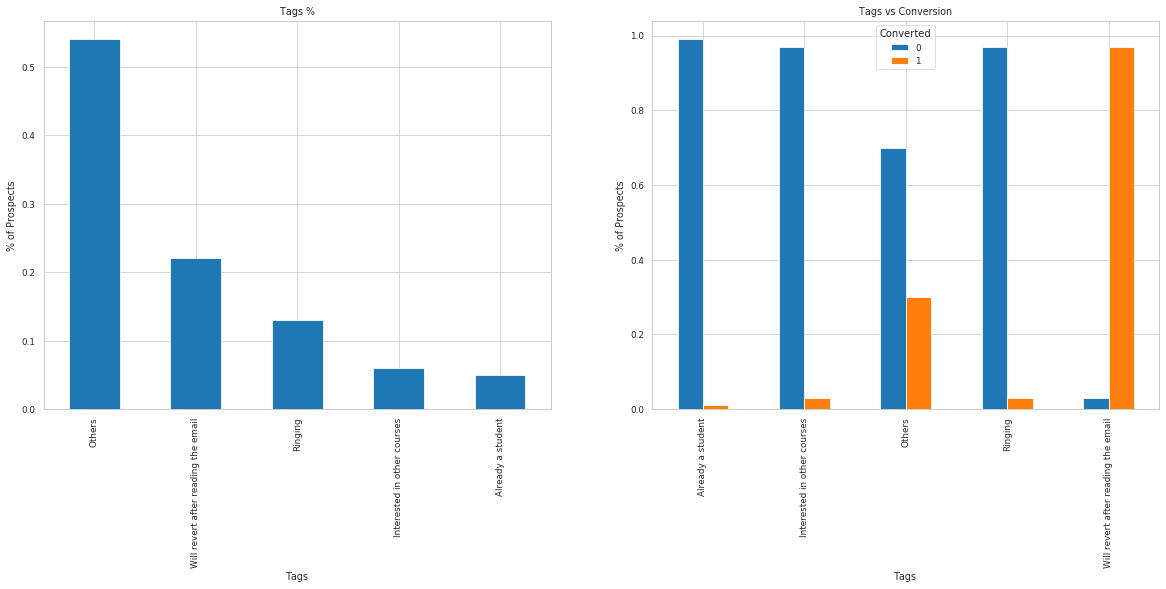

In [430]:
#Plotiing variable w.r.t self and w.r.t target

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Tags'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Tags %')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Tags'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Tags vs Conversion')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [431]:
#Check the unique values
print(round(df['Tags'].value_counts(normalize=True),3).sort_values(ascending = False))

Others                                0.54
Will revert after reading the email   0.22
Ringing                               0.13
Interested in other courses           0.06
Already a student                     0.05
Name: Tags, dtype: float64


In [432]:
#Check the conversion rate
print(round(pd.crosstab(df['Tags'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))

Converted                              0    1
Tags                                         
Already a student                   0.99 0.01
Interested in other courses         0.97 0.03
Others                              0.70 0.30
Ringing                             0.97 0.03
Will revert after reading the email 0.03 0.97


**Inferences:**<BR>
- Univariate Analysis : ~54% of the Tags is from 'Others' category, followed by ~22% from 'Will revert after reading the email'.
- Bivariate Analysis : 'Will revert after reading the email' as a Tags has 97% of Conversion and 'Others' has 30% of Conversion.<BR>

#### City column analysis

In [433]:
df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

**Merging less frequent values of 'City' to 'Others' category.**

In [434]:
# Imputing Null with Others, as it is generally Unknown sources
df['City'] = df['City'].replace(np.nan, 'Others')

# Merging low frequency items to Others
df['City'] = df['City'].replace(['Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities'], 'Others')

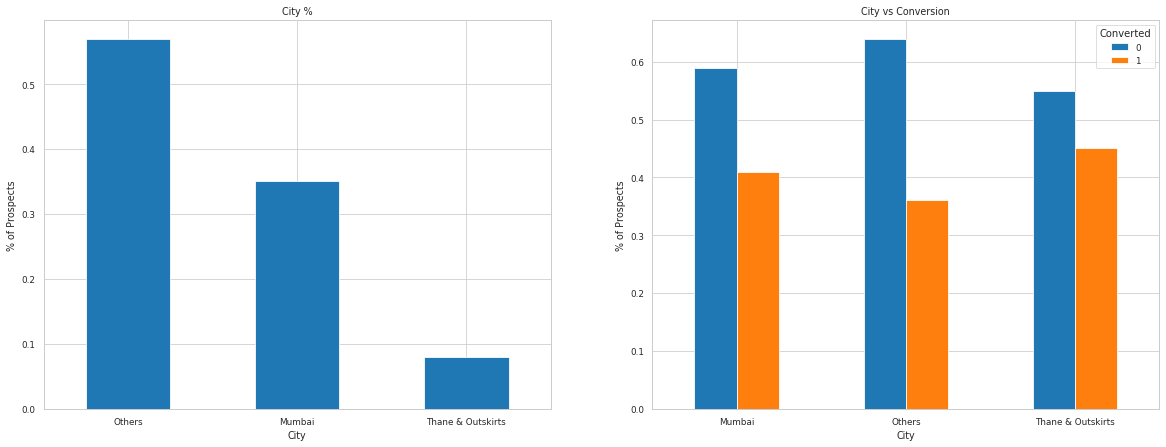

In [435]:
# Plotting w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['City'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('City %')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['City'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('City vs Conversion')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()


In [436]:
# Checking unique value counts 

print(round(df['City'].value_counts(normalize=True),3).sort_values(ascending = False))

Others              0.57
Mumbai              0.35
Thane & Outskirts   0.08
Name: City, dtype: float64


In [437]:
#Check the conversion rate
print(round(pd.crosstab(df['City'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))

Converted            0    1
City                       
Mumbai            0.59 0.41
Others            0.64 0.36
Thane & Outskirts 0.55 0.45


- Univariate Analysis : ~57% of the City is from 'Others' category, followed by ~35% from 'Mumbai' <BR>
- Bivariate Analysis : 'Mumbai' as a City has 41% of Conversion and 'Others' has 36% of Conversion.<BR>

#### A free copy of Mastering The Interview column analysis

In [438]:
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

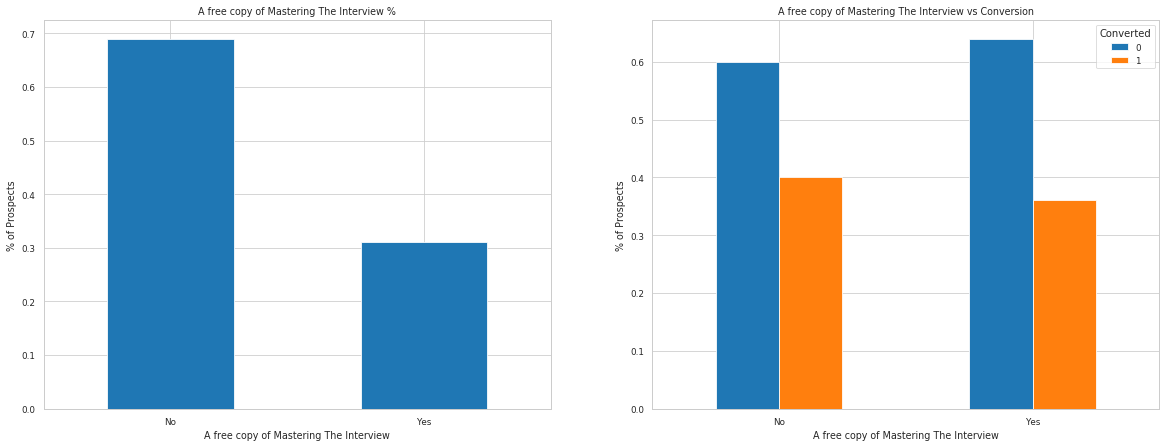

In [439]:
#Ploting the variable w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['A free copy of Mastering The Interview'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('A free copy of Mastering The Interview %')
plt.xlabel('A free copy of Mastering The Interview')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['A free copy of Mastering The Interview'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('A free copy of Mastering The Interview vs Conversion')
plt.xlabel('A free copy of Mastering The Interview')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [440]:
# Checking unique value counts 

print(round(df['A free copy of Mastering The Interview'].value_counts(normalize=True),3).sort_values(ascending = False))

No    0.69
Yes   0.31
Name: A free copy of Mastering The Interview, dtype: float64


In [441]:
#Check the conversion rate
print(round(pd.crosstab(df['A free copy of Mastering The Interview'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))

Converted                                 0    1
A free copy of Mastering The Interview          
No                                     0.60 0.40
Yes                                    0.64 0.36


**Inferences :** <BR>
- Univariate Analysis states : ~68% of the customer said they do not need 'A free copy of Mastering The Interview'. <BR>
- Bivariate Analysis : ~36% of the people who said they need 'A free copy of Mastering The Interview' were converted. 40% of people who said 'No' also Converted.<BR>


#### 'Last Notable Activity' column analysis

In [442]:
# Checking unique value counts 

df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

**Merging less frequent values of 'Last Notable Activity' to 'Others' category.**

In [443]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable',
                                                                       'Had a Phone Conversation', 'Email Marked Spam', 'Form Submitted on Website',
                                                                       'Resubscribed to emails', 'View in browser link Clicked', 'Approached upfront',
                                                                       'Email Received'], 'Others')

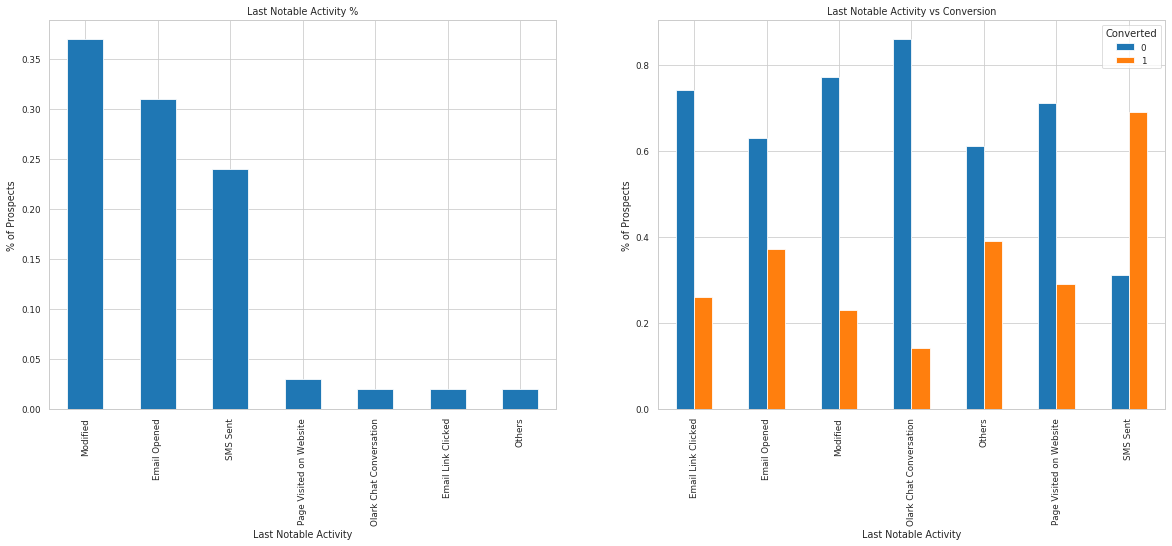

In [444]:
# Plotting w.r.t self as well as w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Last Notable Activity'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Last Notable Activity %')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Last Notable Activity'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Last Notable Activity vs Conversion')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [445]:
# Checking unique value counts 

print(round(df['Last Notable Activity'].value_counts(normalize=True),3).sort_values(ascending = False))

Modified                  0.37
Email Opened              0.31
SMS Sent                  0.23
Page Visited on Website   0.03
Olark Chat Conversation   0.02
Email Link Clicked        0.02
Others                    0.02
Name: Last Notable Activity, dtype: float64


In [446]:
#Check the conversion rate
print(round(pd.crosstab(df['Last Notable Activity'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))

Converted                  0    1
Last Notable Activity            
Email Link Clicked      0.74 0.26
Email Opened            0.63 0.37
Modified                0.77 0.23
Olark Chat Conversation 0.86 0.14
Others                  0.61 0.39
Page Visited on Website 0.71 0.29
SMS Sent                0.31 0.69


**Inferences: <BR>
Univariate Analysis : ~37% of the Last Notable Activity is 'Modified' category, followed by ~31% from 'Email Opened'.<BR>
Bivariate Analysis : 'Email Opened' has 37% of Conversion and 'Modified' has 23% of Conversion.**<BR>

#### Numerical Variable Analysis

In [447]:
num_cols = df.select_dtypes(exclude = 'object')
print(num_cols.columns)

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')


In [448]:
num_cols = num_cols.drop(['Converted','Lead Number'],axis=1)

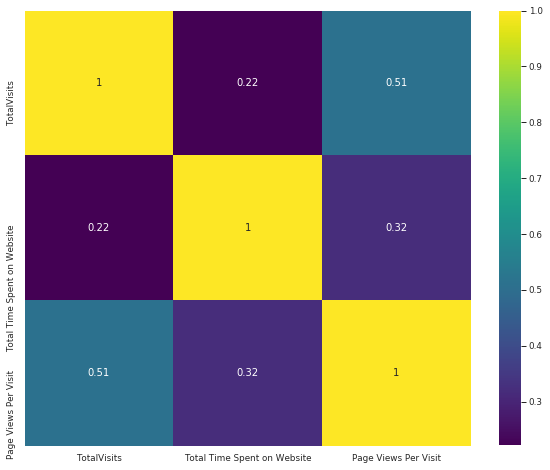

In [449]:
#Checking correlations of numeric values

plt.figure(figsize=(10,8))
# Draw heatmap 
sns.heatmap(num_cols.corr(), cmap='viridis',annot=True)
plt.show()

### Handling Outliers

**Using IQR capping method - It helps to identify the outliers in each of the numeric variable. Impute the outliers with IQR*1.5. This will help us to remove the Outliers and retain the rows**

In [450]:
#Calculate Q1,Q3 and IQR values
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3-Q1
print(Q1,Q3,IQR,IQR*1.5)

TotalVisits                    1.00
Total Time Spent on Website   12.00
Page Views Per Visit           1.00
Name: 0.25, dtype: float64 TotalVisits                     5.00
Total Time Spent on Website   936.00
Page Views Per Visit            3.00
Name: 0.75, dtype: float64 TotalVisits                     4.00
Total Time Spent on Website   924.00
Page Views Per Visit            2.00
dtype: float64 TotalVisits                      6.00
Total Time Spent on Website   1386.00
Page Views Per Visit             3.00
dtype: float64


In [451]:
#Check the numerical column spread
num_cols.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.00,9240.00,9103.00
mean,3.45,487.70,2.36
std,4.85,548.02,2.16
min,0.00,0.00,0.00
25%,1.00,12.00,1.00
50%,3.00,248.00,2.00
75%,5.00,936.00,3.00
max,251.00,2272.00,55.00


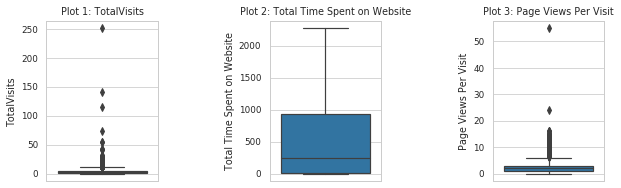

In [452]:
# Checking for outliers in all the numerical columns identified.

plt.figure(figsize=(10,10))

for i in enumerate(num_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]],orient='v')
    plt.title("Plot "+str(i[0]+1)+": "+i[1])
plt.subplots_adjust(wspace=1,hspace=0.2)
    
plt.show()

**We see that 'TotalVisits' and 'Page Views Per Visit' columns have outliers. Handle them using IQR capping.**

#### Page Views Per Visit column handling

In [453]:
# Checking count of unique values

df['Page Views Per Visit'].value_counts(bins=3)

(-0.056, 18.333]    9101
(36.667, 55.0]         1
(18.333, 36.667]       1
Name: Page Views Per Visit, dtype: int64

In [454]:
# Checking values at major percentiles
print(round(df['Page Views Per Visit'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2))

count   9103.00
mean       2.36
std        2.16
min        0.00
25%        1.00
50%        2.00
75%        3.00
90%        5.00
99%        9.00
100%      55.00
max       55.00
Name: Page Views Per Visit, dtype: float64


Text(0, 0.5, '% of Users')

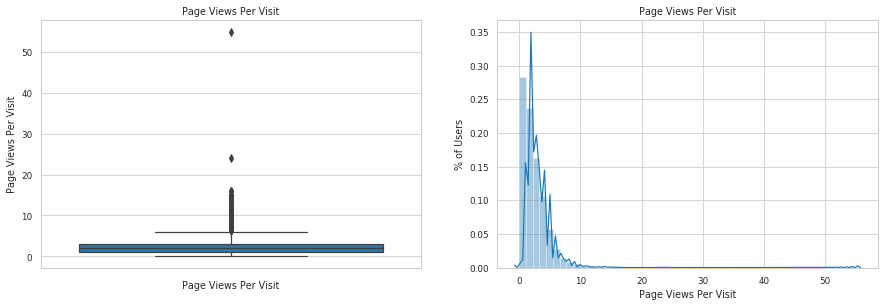

In [455]:
#Plotting before Outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(df['Page Views Per Visit'],orient='v')
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
 
plt.subplot(222)
sns.distplot(df['Page Views Per Visit'].dropna())
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')

In [456]:
# replacing the outlier  (Q3 + 1.5*IQR) with 1.5*IQR

df.loc[df['Page Views Per Visit'] > 6, 'Page Views Per Visit'] = 3

Text(0, 0.5, '% of Users')

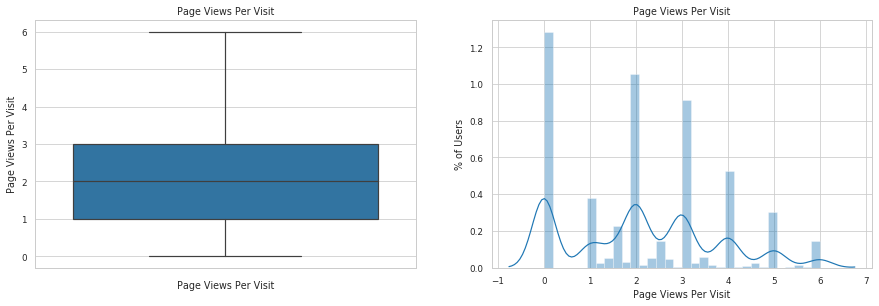

In [457]:
#Plotting After Outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(df['Page Views Per Visit'],orient='v')
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
 
plt.subplot(222)
sns.distplot(df['Page Views Per Visit'].dropna())
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')

#### Handling 'TotalVisits' column

In [458]:
# Checking count of unique values

df['TotalVisits'].value_counts(bins=3)

(-0.252, 83.667]     9100
(83.667, 167.333]       2
(167.333, 251.0]        1
Name: TotalVisits, dtype: int64

In [459]:
# Checking statistical summary of TotalVisits

print(round(df['TotalVisits'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2))

count   9103.00
mean       3.45
std        4.85
min        0.00
25%        1.00
50%        3.00
75%        5.00
90%        7.00
99%       17.00
100%     251.00
max      251.00
Name: TotalVisits, dtype: float64


Text(0, 0.5, '% of Users')

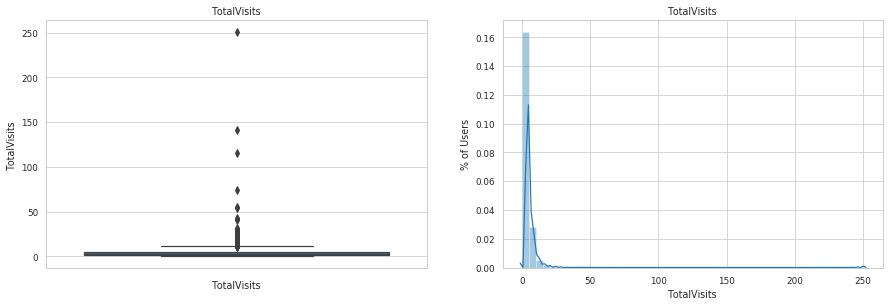

In [460]:
#Plotting before outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(df['TotalVisits'],orient='v')
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)

plt.subplot(222)
sns.distplot(df['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')

In [461]:
# replacing the outlier  (Q3 + 1.5*IQR) with 1.5*IQR

df.loc[df['TotalVisits'] > 11, 'TotalVisits'] = 6

Text(0, 0.5, '% of Users')

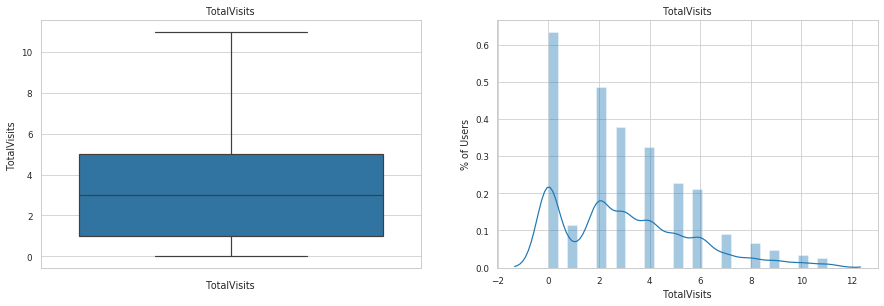

In [462]:
#Plotting after outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(df['TotalVisits'],orient='v')
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)

plt.subplot(222)
sns.distplot(df['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')

**Outliers are treated now.**

In [463]:
print(df.shape)

(9240, 30)


#### Create data set to drop columns in drop list

In [464]:
df_new=df[df.columns[~df.columns.isin(drop_cols)]]

In [465]:
#Check the data after dropping the columns
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   Tags                                    9240 non-null   object 
 9   City                                    9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [466]:
#Check the data set size
print(df_new.shape)

(9240, 12)


In [467]:
#checking percentage of null values in each columns

print(round(100*(df_new.isnull().sum()/len(df_new.index)), 2))

Lead Origin                              0.00
Lead Source                              0.00
Converted                                0.00
TotalVisits                              1.48
Total Time Spent on Website              0.00
Page Views Per Visit                     1.48
Last Activity                            0.00
Specialization                           0.00
Tags                                     0.00
City                                     0.00
A free copy of Mastering The Interview   0.00
Last Notable Activity                    0.00
dtype: float64


**Drop the null values in 'Page Views Per Visit' and 'TotalVisits'**

In [468]:
df_new=df_new.dropna(subset=['Page Views Per Visit','TotalVisits'])

In [469]:
#checking percentage of null values in each columns after replacing nulls

print(round(100*(df_new.isnull().sum()/len(df_new.index)), 2))

Lead Origin                              0.00
Lead Source                              0.00
Converted                                0.00
TotalVisits                              0.00
Total Time Spent on Website              0.00
Page Views Per Visit                     0.00
Last Activity                            0.00
Specialization                           0.00
Tags                                     0.00
City                                     0.00
A free copy of Mastering The Interview   0.00
Last Notable Activity                    0.00
dtype: float64


**No nulls in data set now.**

In [470]:
#Check % of data retained from given data set
print(round((100*df_new.shape[0]/9240),2))

98.52


**retained ~99% of the data!, which is good.**

#### Dummy Variable Creation

In [471]:
#Categorical columns
cols = df_new.select_dtypes(include=['object']).columns
print(cols)

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')


**From prior analysis, 'A Free copy of Mastering The Interview' has binary class.**

In [472]:
mapVars =  ['A free copy of Mastering The Interview']

# Defining the map function
def binaryVals(x):
    return x.map({'Yes': 1, "No": 0})


# Applying the function to the housing list
df_new[mapVars] = df_new[mapVars].apply(binaryVals)

In [473]:
df_new['A free copy of Mastering The Interview'].value_counts()

0    6215
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [474]:
# Converting 'A free copy of Mastering The Interview' to Integer

df_new['A free copy of Mastering The Interview']=df_new['A free copy of Mastering The Interview'].astype("int64")

In [475]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   Tags                                    9103 non-null   object 
 9   City                                    9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   int6

**Handled nulls and conversions required for dummy variable creation.**

In [476]:
# Creating Dummy variables and drop the original column:

df_new = pd.get_dummies(df_new, drop_first=True)

In [477]:
#Check the columns after creating dummy variables
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Converted                                      9103 non-null   int64  
 1   TotalVisits                                    9103 non-null   float64
 2   Total Time Spent on Website                    9103 non-null   int64  
 3   Page Views Per Visit                           9103 non-null   float64
 4   A free copy of Mastering The Interview         9103 non-null   int64  
 5   Lead Origin_Landing Page Submission            9103 non-null   uint8  
 6   Lead Origin_Lead Add Form                      9103 non-null   uint8  
 7   Lead Origin_Lead Import                        9103 non-null   uint8  
 8   Lead Source_Google                             9103 non-null   uint8  
 9   Lead Source_Olark Chat                         9103 

In [478]:
#Check the size after creating dummy variables
print(df_new.shape)

(9103, 50)


#### Test Train data split

In [479]:
from sklearn.model_selection import train_test_split
y = df_new['Converted']

X=df_new.drop('Converted', axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

#### View Correlations

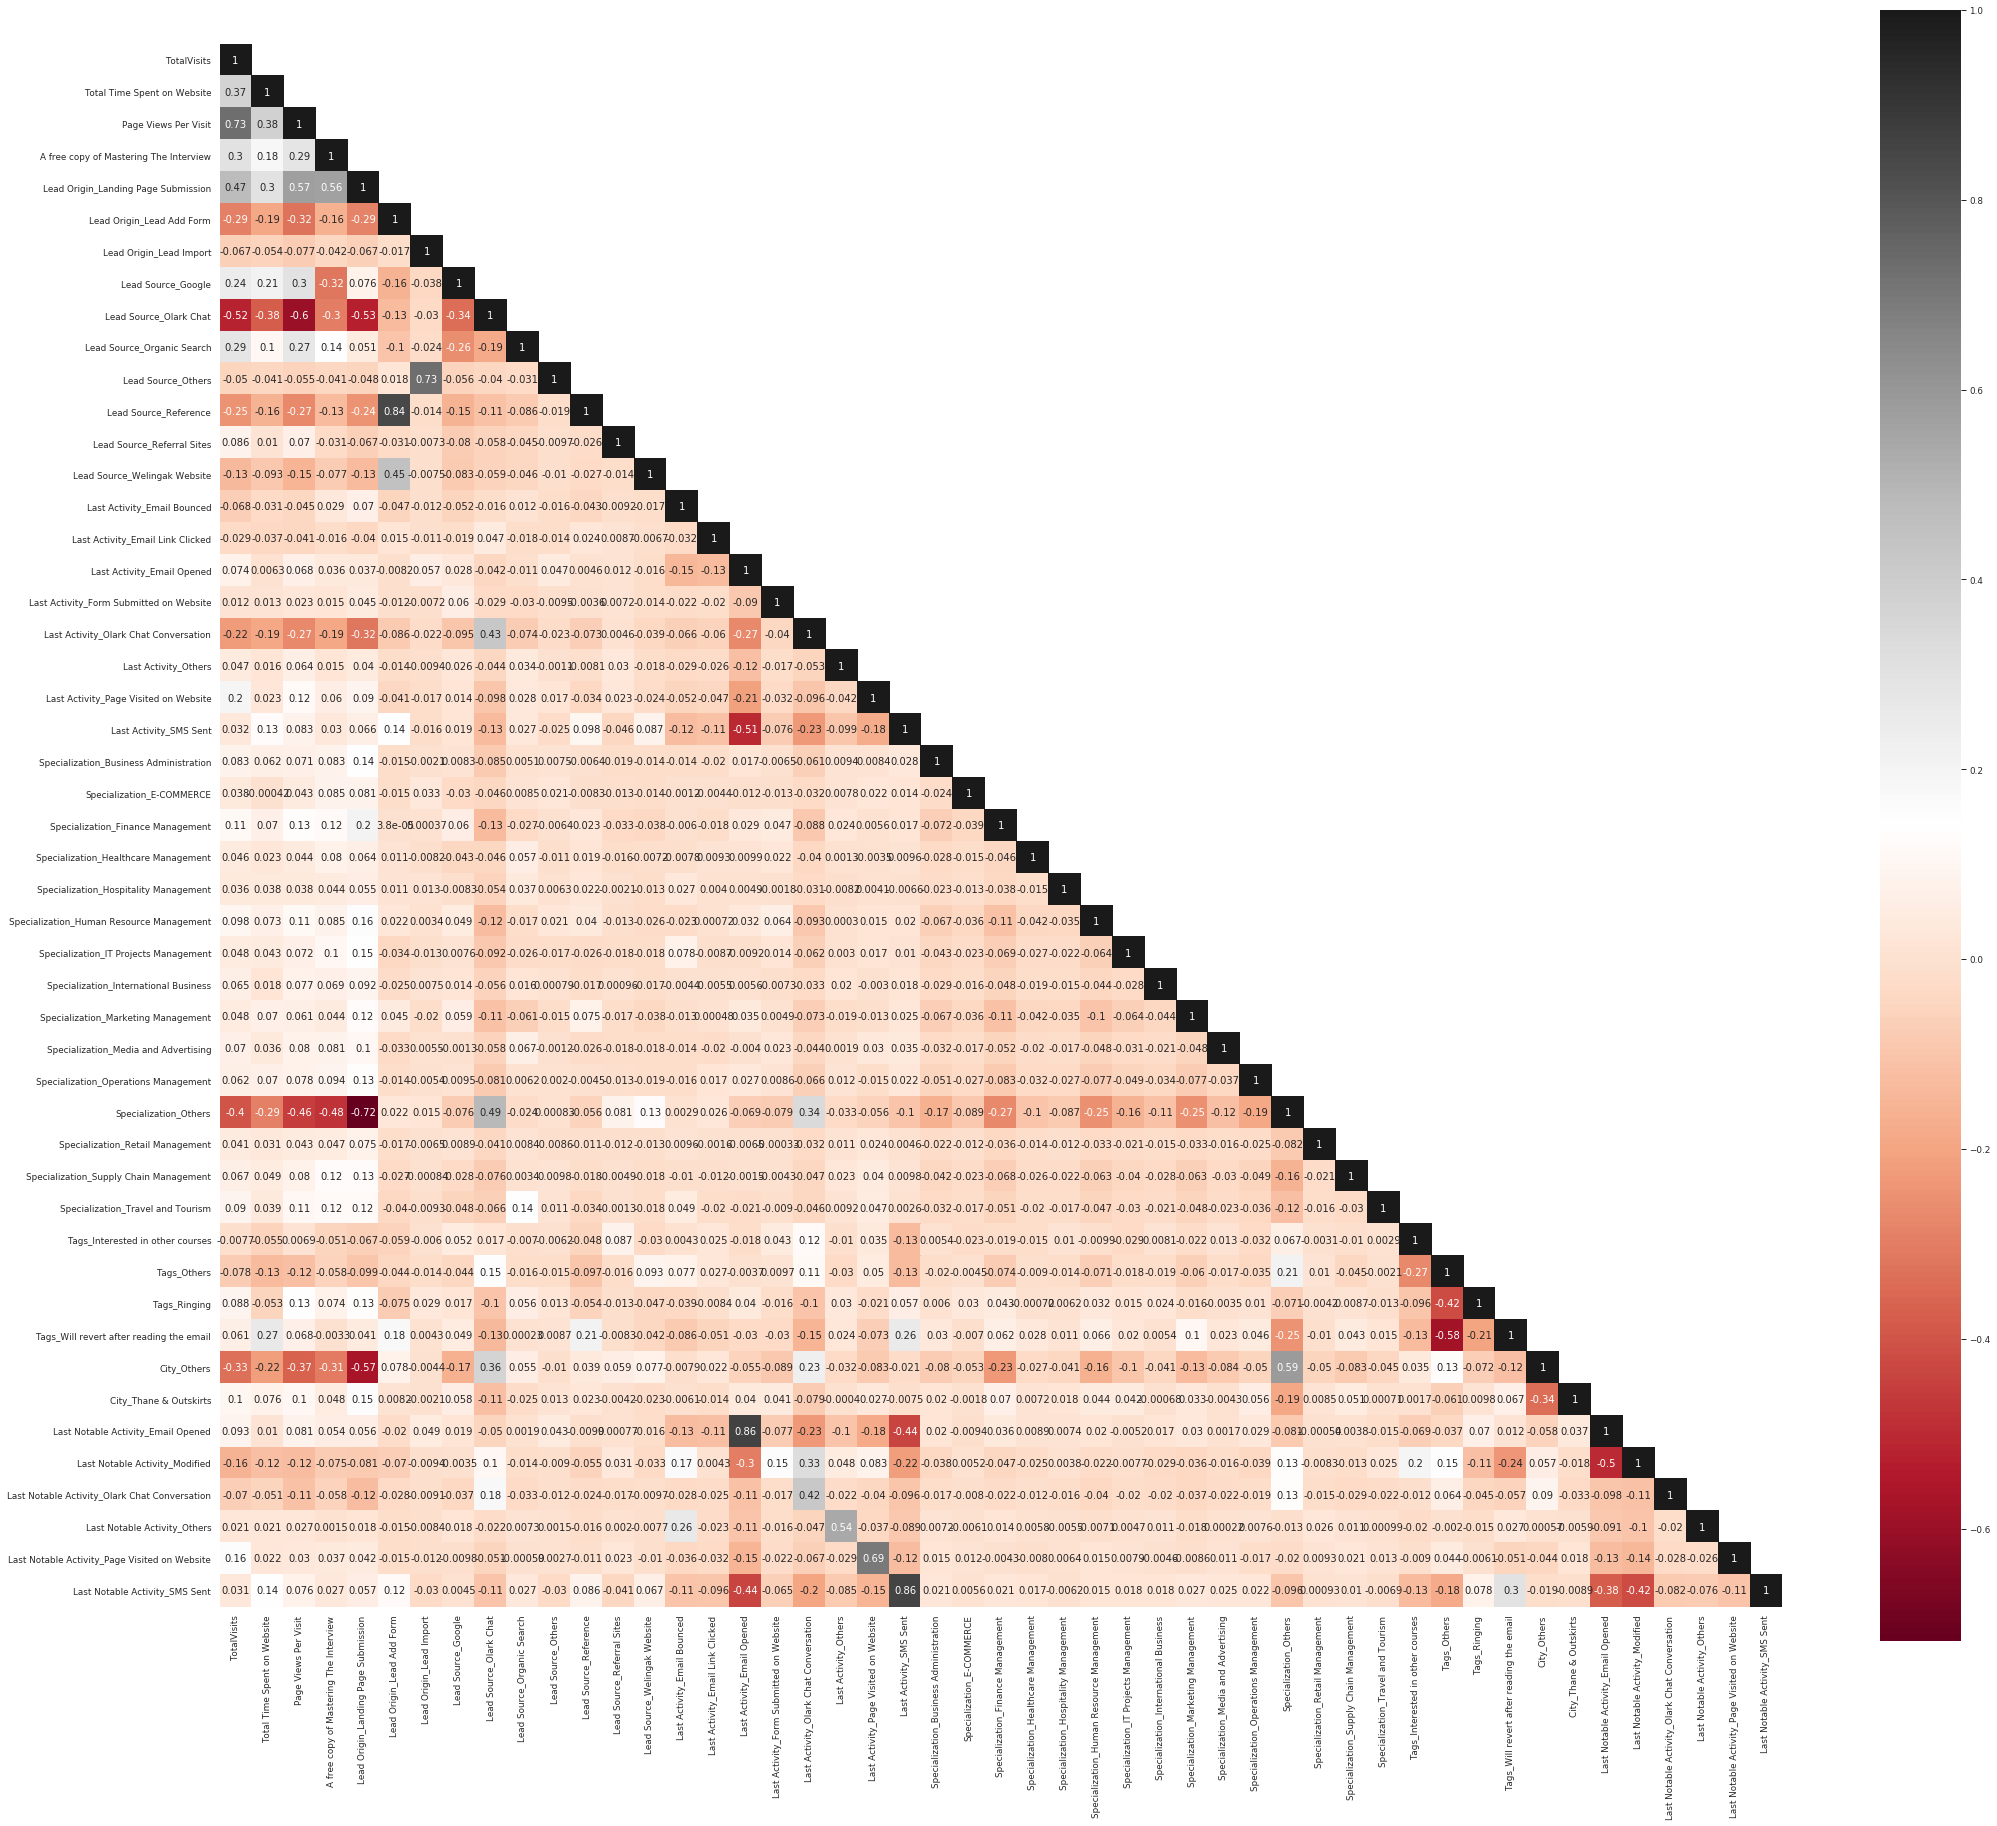

In [480]:
#Understand multicollinearity and correlation of data now
cor_mat= X_train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(35,30)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
plt.show()

**There are many highly correlated variables. Drop variables with correlation above 0.4**

In [481]:
X_test = X_test.drop(['Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others','City_Others',
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened',
                      'Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent', 
                      'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Others', 
                      'Last Notable Activity_Page Visited on Website','Tags_Others'], 1)

X_train = X_train.drop(['Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others','City_Others', 
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened',
                      'Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent', 
                      'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Others', 
                      'Last Notable Activity_Page Visited on Website','Tags_Others'], 1)

In [482]:
#Check the data now
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7282 entries, 9000 to 5734
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               7282 non-null   float64
 1   Total Time Spent on Website               7282 non-null   int64  
 2   A free copy of Mastering The Interview    7282 non-null   int64  
 3   Lead Origin_Lead Add Form                 7282 non-null   uint8  
 4   Lead Origin_Lead Import                   7282 non-null   uint8  
 5   Lead Source_Google                        7282 non-null   uint8  
 6   Lead Source_Organic Search                7282 non-null   uint8  
 7   Lead Source_Referral Sites                7282 non-null   uint8  
 8   Last Activity_Email Bounced               7282 non-null   uint8  
 9   Last Activity_Email Link Clicked          7282 non-null   uint8  
 10  Last Activity_Email Opened       

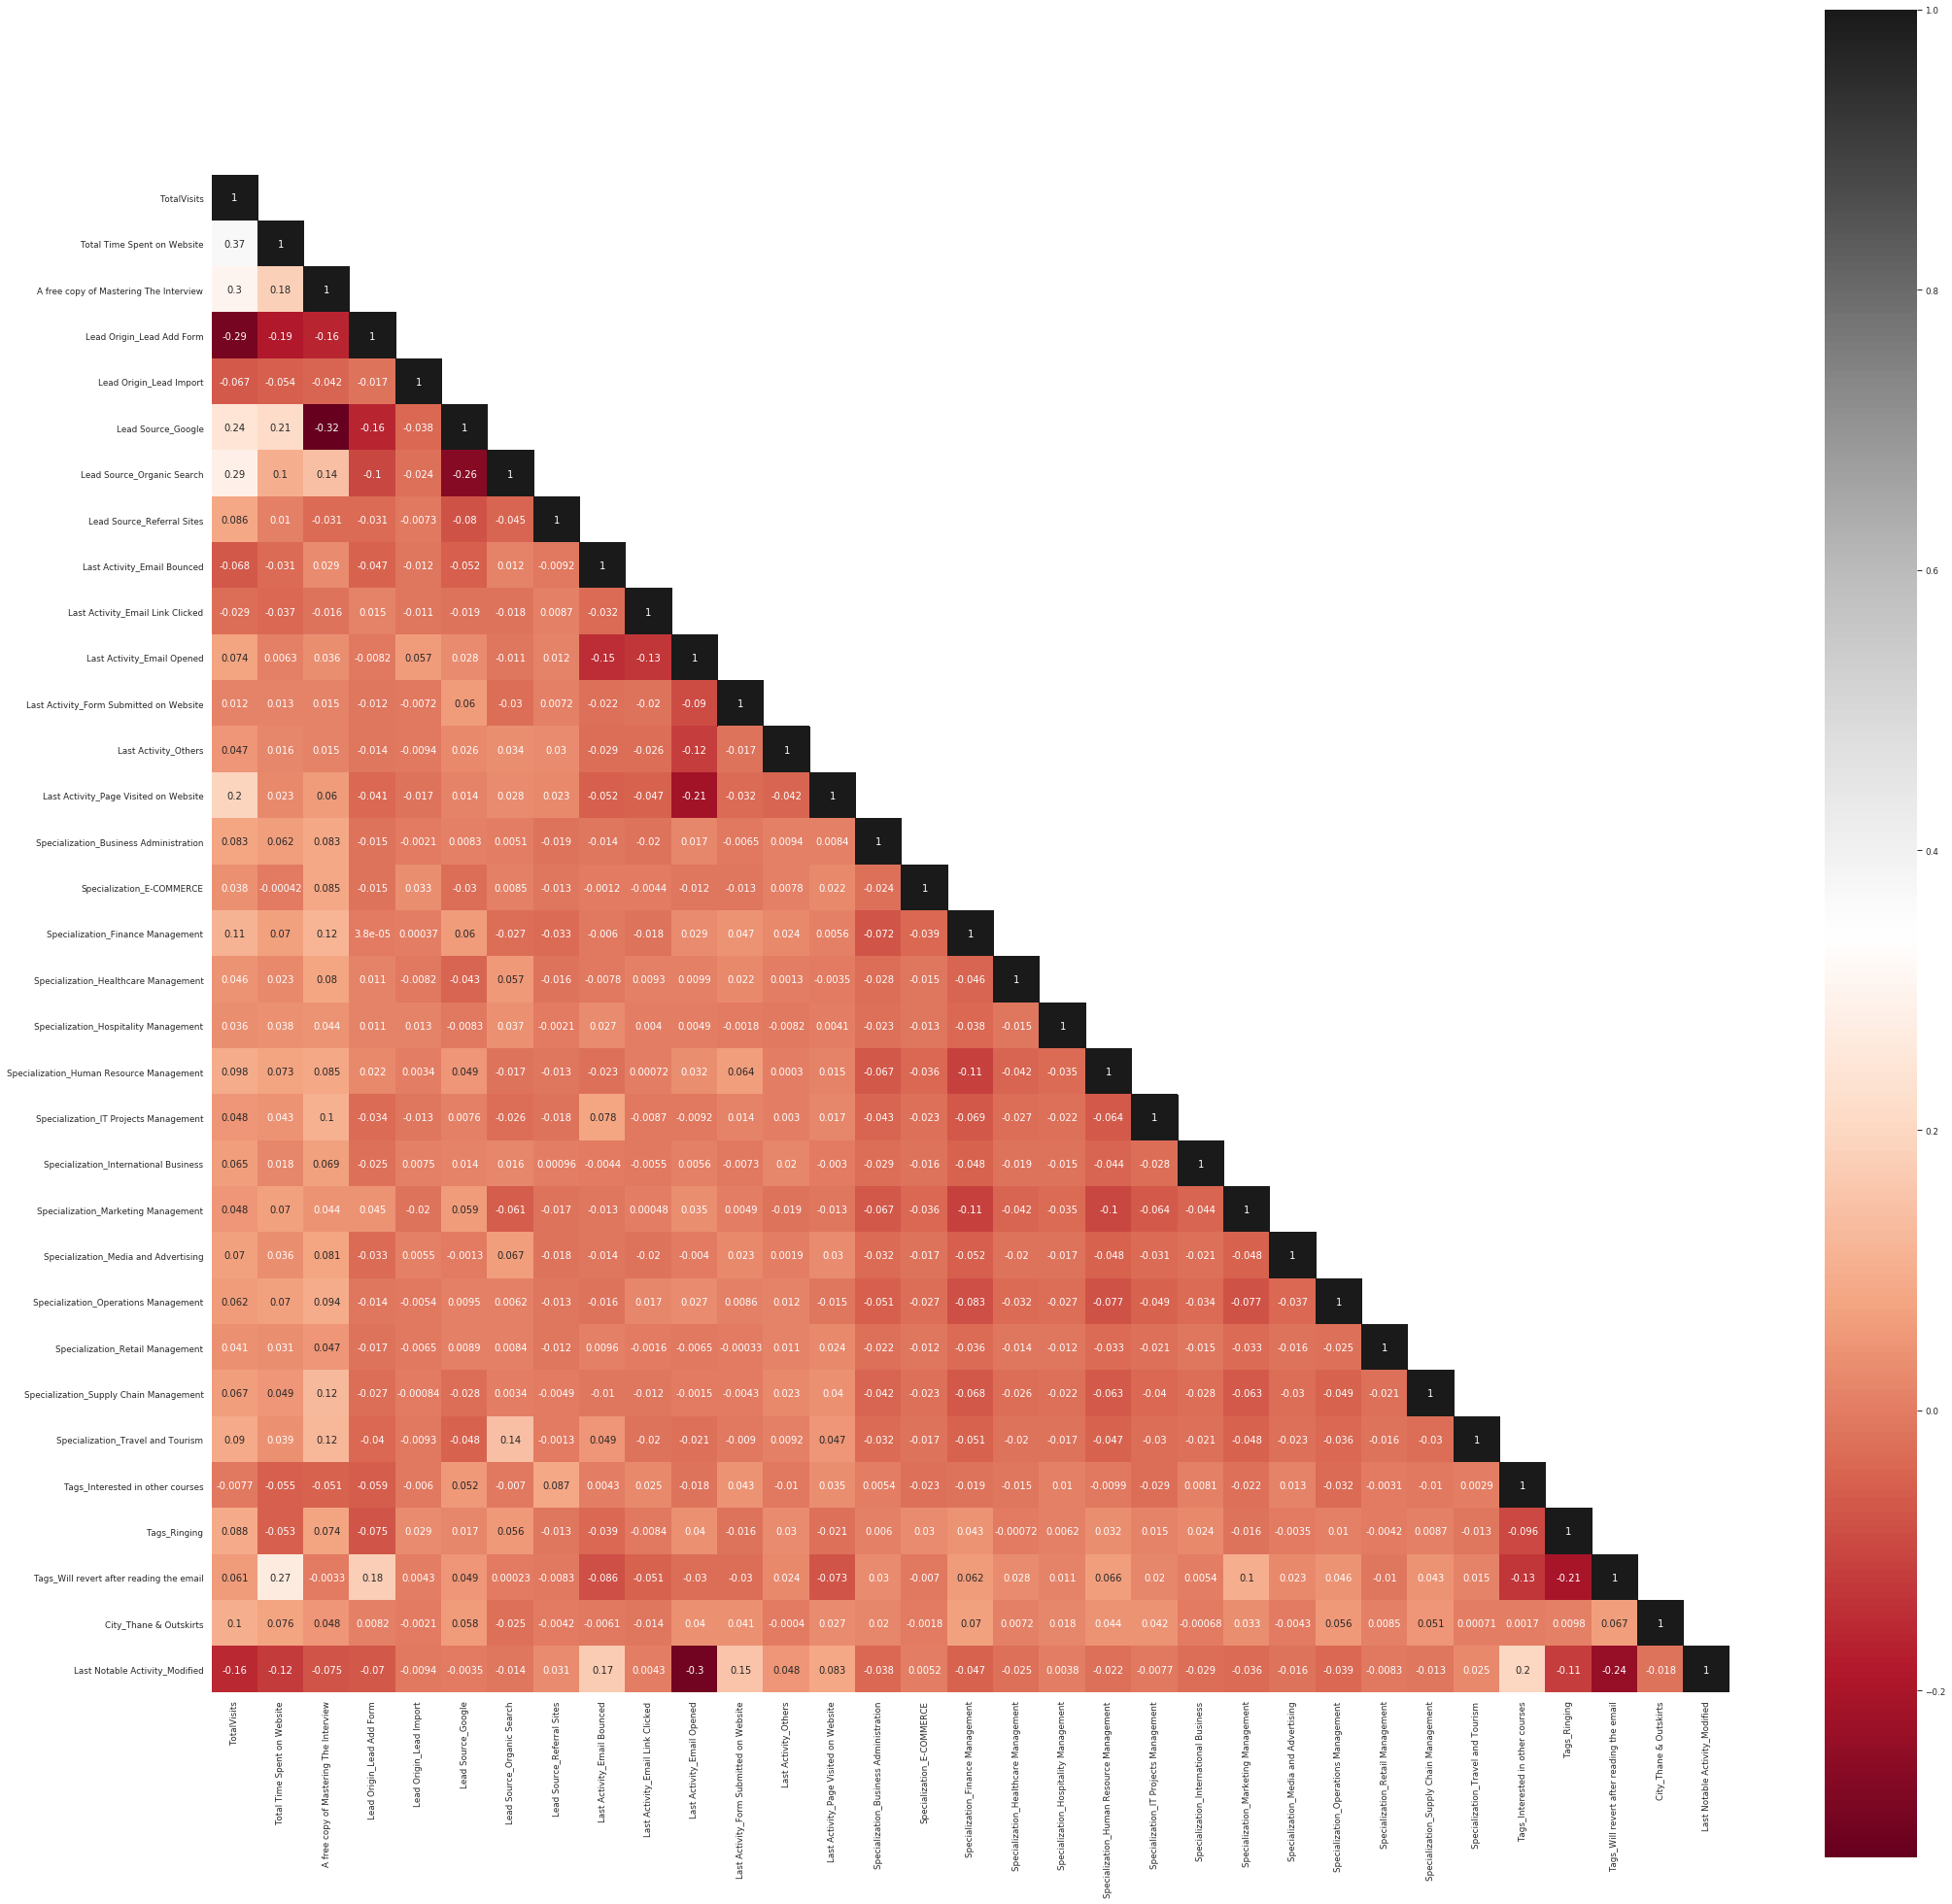

In [483]:
#Verify the correlation after dropping columns with high correlation
cor_mat= X_train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(35,35)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
plt.show()

#### Feature Scaling

In [484]:
X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Others,Last Activity_Page Visited on Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
9000,2.00,60,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6902,1.00,495,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7593,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1498,9.00,413,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4137,6.00,1049,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [485]:
# Selecting the variables that needs to be scaled
from sklearn.preprocessing import StandardScaler

var_to_scale=['TotalVisits','Total Time Spent on Website']
scaler = StandardScaler()

X_train[var_to_scale] = scaler.fit_transform(X_train[var_to_scale])

X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Others,Last Activity_Page Visited on Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
9000,-0.41,-0.77,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6902,-0.80,0.03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7593,-1.18,-0.88,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1498,2.27,-0.12,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4137,1.12,1.04,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Build the model

In [486]:
#import required libraries to build the model and perform RFE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [487]:
#Define functions to build logistic regression model and check VIF
def build_lr_model(col):
    col_sm = sm.add_constant(X_train[col])
    result = sm.Logit(y_train, col_sm,family = sm.families.Binomial())
    result_model = result.fit()
    return result_model
    

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

def checkVIF(val):
    vif = pd.DataFrame()
    vif['Features'] = val.columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(val.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#### Model 1 (Train)

In [488]:
#Build initial model and print the summary 
print(build_lr_model(X_train.columns).summary())

Optimization terminated successfully.
         Current function value: 0.295196
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7248
Method:                           MLE   Df Model:                           33
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.5551
Time:                        11:25:16   Log-Likelihood:                -2149.6
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.1

In [489]:
#Perform RFE and select 15 features
logreg = LogisticRegression()
rfe = RFE(logreg,15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [490]:
rfe.support_

array([False,  True, False,  True,  True, False, False,  True,  True,
        True,  True, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True,  True,  True,  True, False,  True])

In [491]:
#View the columns selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Referral Sites', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 4),
 ('Last Activity_Others', False, 3),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-COMMERCE', False, 6),
 ('Specialization_Finance Management', False, 13),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 2),
 ('Specialization_Human Resource Management', False, 14),
 ('Specialization_IT Projects Management', False, 19),
 ('Specialization_Interna

In [492]:
col = X_train.columns[rfe.support_]
print(col)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')


In [493]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Last Activity_Form Submitted on Website', 'Last Activity_Others',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Supply Chain Management', 'City_Thane & Outskirts'],
      dtype='object')

#### Model 2(Train)

In [494]:
#Build the model with selected 15 columns
print(build_lr_model(col).summary())

Optimization terminated successfully.
         Current function value: 0.296769
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7266
Method:                           MLE   Df Model:                           15
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.5527
Time:                        11:25:17   Log-Likelihood:                -2161.1
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3

#### Check VIF

In [495]:
# Check for the VIF values of the feature variables. 
checkVIF(X_train[col])

                                    Features  VIF
14            Last Notable Activity_Modified 1.31
13  Tags_Will revert after reading the email 1.29
6                 Last Activity_Email Opened 1.22
1                  Lead Origin_Lead Add Form 1.18
0                Total Time Spent on Website 1.16
11          Tags_Interested in other courses 1.13
12                              Tags_Ringing 1.10
4                Last Activity_Email Bounced 1.08
7      Last Activity_Page Visited on Website 1.08
10         Specialization_Travel and Tourism 1.03
3                 Lead Source_Referral Sites 1.02
5           Last Activity_Email Link Clicked 1.02
8       Specialization_Healthcare Management 1.02
9      Specialization_International Business 1.02
2                    Lead Origin_Lead Import 1.01


**Removing 'Lead Origin_Lead Import' as per it's insignificant predictive power(as per it's p-value)**

In [496]:
#Drop the column with 
col1=col.drop('Lead Origin_Lead Import')
print(col1)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')


#### Model 3 (Train)

In [497]:
print(build_lr_model(col1).summary())

Optimization terminated successfully.
         Current function value: 0.296832
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7267
Method:                           MLE   Df Model:                           14
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.5526
Time:                        11:25:17   Log-Likelihood:                -2161.5
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3

In [498]:
checkVIF(X_train[col1])

                                    Features  VIF
13            Last Notable Activity_Modified 1.29
6      Last Activity_Page Visited on Website 1.22
1                  Lead Origin_Lead Add Form 1.18
0                Total Time Spent on Website 1.16
11                              Tags_Ringing 1.13
12  Tags_Will revert after reading the email 1.10
4           Last Activity_Email Link Clicked 1.08
7       Specialization_Healthcare Management 1.08
10          Tags_Interested in other courses 1.03
3                Last Activity_Email Bounced 1.02
5                 Last Activity_Email Opened 1.02
8      Specialization_International Business 1.02
9          Specialization_Travel and Tourism 1.02
2                 Lead Source_Referral Sites 1.01


**Drop 'Lead Source_Referral Sites' since it has insignificant predictive value(it's p-value)**

In [499]:
col2=col1.drop('Lead Source_Referral Sites')
print(col2)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')


#### Build Model 4(Train)

In [500]:
print(build_lr_model(col2).summary())

Optimization terminated successfully.
         Current function value: 0.296951
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7268
Method:                           MLE   Df Model:                           13
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.5524
Time:                        11:25:17   Log-Likelihood:                -2162.4
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3

In [501]:
checkVIF(X_train[col2])

                                    Features  VIF
6       Specialization_Healthcare Management 1.22
1                  Lead Origin_Lead Add Form 1.18
0                Total Time Spent on Website 1.16
11  Tags_Will revert after reading the email 1.13
12            Last Notable Activity_Modified 1.10
4                 Last Activity_Email Opened 1.08
7      Specialization_International Business 1.08
10                              Tags_Ringing 1.03
3           Last Activity_Email Link Clicked 1.02
5      Last Activity_Page Visited on Website 1.02
8          Specialization_Travel and Tourism 1.02
9           Tags_Interested in other courses 1.02
2                Last Activity_Email Bounced 1.01


**Drop 'Specialization_International Business'.**

In [502]:
col3=col2.drop('Specialization_International Business')
print(col3)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')


#### Build Model 5(Train)

In [503]:
print(build_lr_model(col3).summary())

Optimization terminated successfully.
         Current function value: 0.297101
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7269
Method:                           MLE   Df Model:                           12
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.5522
Time:                        11:25:17   Log-Likelihood:                -2163.5
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4

In [504]:
checkVIF(X_train[col3])

                                    Features  VIF
6       Specialization_Healthcare Management 1.22
1                  Lead Origin_Lead Add Form 1.18
0                Total Time Spent on Website 1.16
11            Last Notable Activity_Modified 1.13
4                 Last Activity_Email Opened 1.08
7          Specialization_Travel and Tourism 1.08
10  Tags_Will revert after reading the email 1.03
3           Last Activity_Email Link Clicked 1.02
5      Last Activity_Page Visited on Website 1.02
8           Tags_Interested in other courses 1.02
9                               Tags_Ringing 1.02
2                Last Activity_Email Bounced 1.01


**Drop 'Specialization_Healthcare Management' with insignificant Predictive value(p-value)**

In [505]:
col4=col3.drop('Specialization_Healthcare Management')
print(col4)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')


#### Build Model 6(Train)

In [506]:
print(build_lr_model(col4).summary())

Optimization terminated successfully.
         Current function value: 0.297285
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7270
Method:                           MLE   Df Model:                           11
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.5519
Time:                        11:25:17   Log-Likelihood:                -2164.8
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4

In [507]:
checkVIF(X_train[col4])

                                    Features  VIF
6          Specialization_Travel and Tourism 1.22
1                  Lead Origin_Lead Add Form 1.18
0                Total Time Spent on Website 1.16
4                 Last Activity_Email Opened 1.08
7           Tags_Interested in other courses 1.08
10            Last Notable Activity_Modified 1.03
3           Last Activity_Email Link Clicked 1.02
5      Last Activity_Page Visited on Website 1.02
8                               Tags_Ringing 1.02
9   Tags_Will revert after reading the email 1.02
2                Last Activity_Email Bounced 1.01


#### Predicted Probability Calculation

In [508]:
# Getting the predicted values on the train set
result = build_lr_model(col4)
col_sm = sm.add_constant(X_train[col4])
y_train_pred = result.predict(col_sm)
y_train_pred

Optimization terminated successfully.
         Current function value: 0.297285
         Iterations 8


9000   0.09
6902   0.08
7593   0.13
1498   0.23
4137   0.98
       ... 
367    0.13
82     0.89
8173   0.10
7055   0.95
5734   0.01
Length: 7282, dtype: float64

In [509]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09361186, 0.08170712, 0.12823739, 0.23253994, 0.98312949,
       0.99533967, 0.00507647, 0.95698636, 0.78758376, 0.41632835])

**Creating a data frame with actual converted flag and probability predictions**

In [510]:
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
print(y_train_pred_final.head())

   Converted_IND  Converted_Prob  Prospect_IND
0              0            0.09          9000
1              0            0.08          6902
2              0            0.13          7593
3              0            0.23          1498
4              1            0.98          4137


**Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0**

In [511]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
print(y_train_pred_final.head())

   Converted_IND  Converted_Prob  Prospect_IND  Predicted
0              0            0.09          9000          0
1              0            0.08          6902          0
2              0            0.13          7593          0
3              0            0.23          1498          0
4              1            0.98          4137          1


#### Creating Confusion Matrix

In [512]:
from sklearn import metrics
def plotCM( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Greens",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

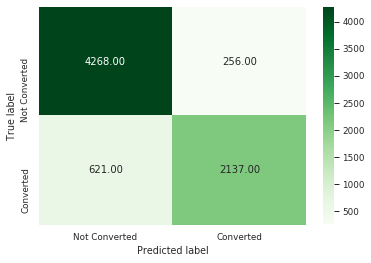

[[4268  256]
 [ 621 2137]]


In [513]:
# look at the confusion matrix
plotCM( y_train_pred_final.Converted_IND, y_train_pred_final.Predicted)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted )
print(confusion)

#### Accuracy

In [514]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted))


0.8795660532820654


In [515]:
print( metrics.classification_report( y_train_pred_final.Converted_IND, y_train_pred_final.Predicted ))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4524
           1       0.89      0.77      0.83      2758

    accuracy                           0.88      7282
   macro avg       0.88      0.86      0.87      7282
weighted avg       0.88      0.88      0.88      7282



#### Metrics

In [516]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [517]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7748368382886149

In [518]:
# Let us calculate specificity
TN / float(TN+FP)

0.9434129089301503

In [519]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05658709106984969


In [520]:
# positive predictive value 
print (TP / float(TP+FP))

0.893021312160468


In [521]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8729801595418286


#### Plot ROC Curve

- Helps to understand the tradeoff between sensitivity and specificity
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [522]:
def plotROC( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

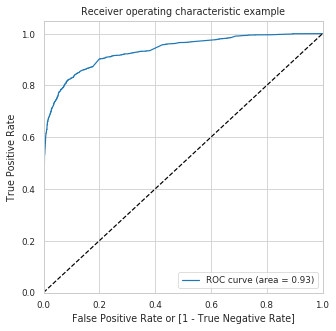

In [523]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob, drop_intermediate = False )
plotROC(y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob)

#### Find Optimal Cut-off

In [524]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
print(y_train_pred_final.head())

   Converted_IND  Converted_Prob  Prospect_IND  Predicted  0.0  0.1  0.2  0.3  \
0              0            0.09          9000          0    1    0    0    0   
1              0            0.08          6902          0    1    0    0    0   
2              0            0.13          7593          0    1    1    0    0   
3              0            0.23          1498          0    1    1    1    0   
4              1            0.98          4137          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    1    1    1    1    1    1  


In [525]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.68   0.97   0.51
0.20  0.20      0.83   0.91   0.78
0.30  0.30      0.87   0.84   0.88
0.40  0.40      0.88   0.81   0.92
0.50  0.50      0.88   0.77   0.94
0.60  0.60      0.88   0.74   0.96
0.70  0.70      0.87   0.69   0.98
0.80  0.80      0.86   0.65   0.99
0.90  0.90      0.84   0.59   0.99


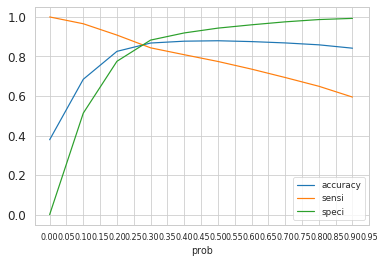

In [526]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

#### threshold 0.27 from above curve

In [527]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.27 else 0)

print(y_train_pred_final.head())

   Converted_IND  Converted_Prob  Prospect_IND  Predicted  0.0  0.1  0.2  0.3  \
0              0            0.09          9000          0    1    0    0    0   
1              0            0.08          6902          0    1    0    0    0   
2              0            0.13          7593          0    1    1    0    0   
3              0            0.23          1498          0    1    1    1    0   
4              1            0.98          4137          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                0  
3    0    0    0    0    0    0                0  
4    1    1    1    1    1    1                1  


In [528]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted))

0.8630870639934084


In [529]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted )
print(confusion2)

[[3929  595]
 [ 402 2356]]


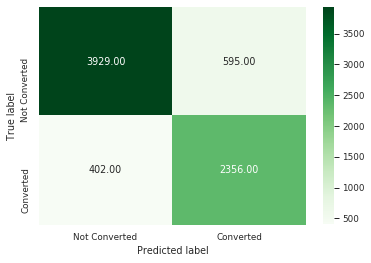

In [530]:
#Invoking the function
plotCM( y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

In [531]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [532]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8542422044960116

In [533]:
# Let us calculate specificity
TN / float(TN+FP)

0.8684792219274978

In [534]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1315207780725022


In [535]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7983734327346662


In [536]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9071807896559686


#### Precision & Recall

Precision
TP / TP + FP

In [537]:
print(confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]))

0.7983734327346662


Recall
TP / TP + FN

In [538]:
print(confusion2[1,1]/(confusion2[1,0]+confusion2[1,1]))

0.8542422044960116


In [539]:
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.09,9000,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.08,6902,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.13,7593,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.23,1498,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.98,4137,1,1,1,1,1,1,1,1,1,1,1,1


**Using sklearn Functions**

In [540]:
from sklearn.metrics import precision_score, recall_score
#Precision Value
print('Precision Score - ',precision_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted))
print('Recall Value - ',recall_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted))

Precision Score -  0.893021312160468
Recall Value -  0.7748368382886149


Appropriate Metrics to be used in this context are Recall and Precision.
This is beacuase<br>
- They help us to identify the predicted CONVERTED , actual CONVERTED
- There is a probability that an actual CONVERTED case is predicted correctly.
<br>
So, we will use the Precision-Recall trade off curve to identify the most optimised threshold.

In [541]:
from sklearn.metrics import precision_recall_curve
print(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted)

0       0
1       0
2       0
3       0
4       1
       ..
7277    0
7278    1
7279    1
7280    1
7281    0
Name: Converted_IND, Length: 7282, dtype: int64 0       0
1       0
2       0
3       0
4       1
       ..
7277    0
7278    1
7279    0
7280    1
7281    0
Name: Predicted, Length: 7282, dtype: int64


In [542]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob)

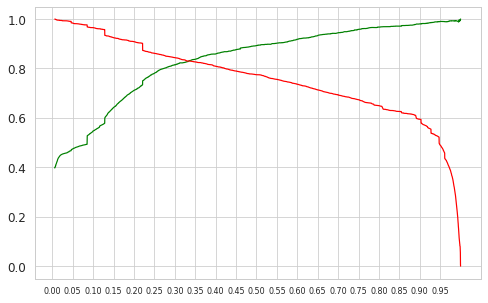

In [543]:
# Plotting the precision recall curve

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)

plt.show()

**The Precission & Recall Trade Off from above curve is 0.34 We will use this as threshold for Test data.**

In [544]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

print(y_train_pred_final.head())

   Converted_IND  Converted_Prob  Prospect_IND  Predicted  0.0  0.1  0.2  0.3  \
0              0            0.09          9000          0    1    0    0    0   
1              0            0.08          6902          0    1    0    0    0   
2              0            0.13          7593          0    1    1    0    0   
3              0            0.23          1498          0    1    1    1    0   
4              1            0.98          4137          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                0  
3    0    0    0    0    0    0                0  
4    1    1    1    1    1    1                1  


In [545]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted))

0.8728371326558638


In [546]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted )
print(confusion3)

[[4069  455]
 [ 471 2287]]


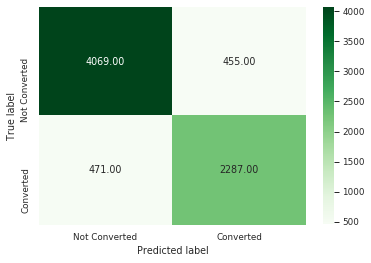

In [547]:
plotCM( y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

In [548]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [549]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8292240754169689

In [550]:
# Let us calculate specificity
TN / float(TN+FP)

0.8994252873563219

In [551]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10057471264367816


In [552]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8340627279358133


In [553]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8962555066079295


#### Precision & Recall

Precision
TP / TP + FP

In [554]:
print(confusion3[1,1]/(confusion3[0,1]+confusion3[1,1]))

0.8340627279358133


Recall
TP / TP + FN

In [555]:
print(confusion3[1,1]/(confusion3[1,0]+confusion3[1,1]))

0.8292240754169689


#### Predictions on Test Set

In [556]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 3504 to 8487
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               1821 non-null   float64
 1   Total Time Spent on Website               1821 non-null   int64  
 2   A free copy of Mastering The Interview    1821 non-null   int64  
 3   Lead Origin_Lead Add Form                 1821 non-null   uint8  
 4   Lead Origin_Lead Import                   1821 non-null   uint8  
 5   Lead Source_Google                        1821 non-null   uint8  
 6   Lead Source_Organic Search                1821 non-null   uint8  
 7   Lead Source_Referral Sites                1821 non-null   uint8  
 8   Last Activity_Email Bounced               1821 non-null   uint8  
 9   Last Activity_Email Link Clicked          1821 non-null   uint8  
 10  Last Activity_Email Opened       

In [557]:
# Scaling the Test Set
X_test[var_to_scale] = scaler.transform(X_test[var_to_scale])

In [558]:
X_test = X_test[col4]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Page Visited on Website,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified
3504,-0.10,0,0,0,1,0,0,0,1,0,0
4050,-0.88,1,0,0,0,0,0,0,0,1,0
7201,0.42,0,0,0,0,0,0,0,0,0,0
1196,-0.11,0,0,0,1,0,1,0,1,0,0
8219,-0.43,0,0,0,0,1,0,0,0,0,0


In [559]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [560]:
# Removing 'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
#          'Specialization_Healthcare Management' & 'Specialization_International Business'

#Removing columns that were removed during train model building exercise from X_test_sm
 
X_test_sm=X_test_sm[['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified']]

#### Making Predictions

In [561]:
# Predicting the final test model
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3504   0.01
4050   1.00
7201   0.50
1196   0.00
8219   0.14
8747   0.13
9048   0.75
6524   0.11
7693   0.27
8187   0.46
dtype: float64

In [562]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
print(y_pred_1.head())

        0
3504 0.01
4050 1.00
7201 0.50
1196 0.00
8219 0.14


In [563]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
print(y_test_df.head())

      Converted
3504          0
4050          1
7201          0
1196          0
8219          1


In [564]:
# Putting CustID to index
y_test_df['Prospect_IND'] = y_test_df.index

In [565]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [566]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
print(y_pred_final.head())

   Converted  Prospect_IND    0
0          0          3504 0.01
1          1          4050 1.00
2          0          7201 0.50
3          0          1196 0.00
4          1          8219 0.14


In [567]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

In [568]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)
print(y_pred_final.head())

   Prospect_IND  Converted_IND  Converted_Prob
0          3504              0            0.01
1          4050              1            1.00
2          7201              0            0.50
3          1196              0            0.00
4          8219              1            0.14


#### Using threshold 0.34 derived while build the model with train data set

In [569]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)
print(y_pred_final.head())

   Prospect_IND  Converted_IND  Converted_Prob  final_predicted
0          3504              0            0.01                0
1          4050              1            1.00                1
2          7201              0            0.50                1
3          1196              0            0.00                0
4          8219              1            0.14                0


#### Overall Accuracy

In [570]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Converted_IND, y_pred_final.final_predicted))


0.8780889621087314


#### Confusion Matrix (Test Predict)

In [571]:
confusion_final = metrics.confusion_matrix(y_pred_final.Converted_IND, y_pred_final.final_predicted )
print(confusion_final)

[[1011  107]
 [ 115  588]]


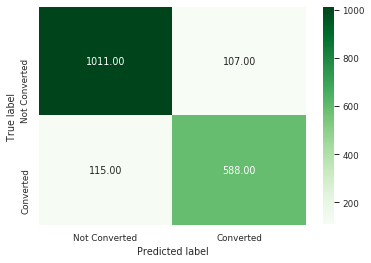

In [572]:
#Invoking the function
plotCM( y_pred_final.Converted_IND, y_pred_final.final_predicted )

In [573]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

#### Sensitivity

In [574]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

0.8364153627311522


#### Specificity

In [575]:
#Let us calculate specificity
print(TN / float(TN+FP))

0.9042933810375671


In [576]:
y_test=y_pred_final["Converted_IND"]
print(y_test)

0       0
1       1
2       0
3       0
4       1
       ..
1816    1
1817    1
1818    1
1819    1
1820    0
Name: Converted_IND, Length: 1821, dtype: int64


#### Precision & Recall

In [577]:
print('Precision - ',confusion_final[1,1]/(confusion_final[0,1]+confusion_final[1,1]))

Precision -  0.8460431654676259


In [578]:
print('Recall - ',confusion_final[1,1]/(confusion_final[1,0]+confusion_final[1,1]))

Recall -  0.8364153627311522


#### ROC Curve

In [579]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted_IND,
                                         y_pred_final.Converted_Prob, drop_intermediate=False)

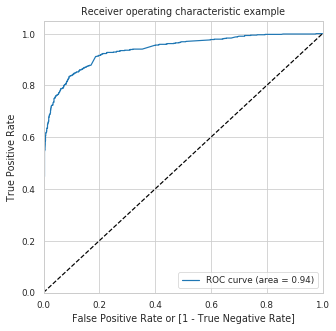

In [580]:
plotROC(y_pred_final.Converted_IND, y_pred_final.Converted_Prob)

#### Lead Scoring

In [581]:
print(y_pred_final)

      Prospect_IND  Converted_IND  Converted_Prob  final_predicted
0             3504              0            0.01                0
1             4050              1            1.00                1
2             7201              0            0.50                1
3             1196              0            0.00                0
4             8219              1            0.14                0
...            ...            ...             ...              ...
1816           643              1            0.04                0
1817          7424              1            0.97                1
1818          1529              1            0.60                1
1819          7525              1            1.00                1
1820          8487              0            0.08                0

[1821 rows x 4 columns]


In [582]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,Lead_Score
0,3504,0,0.01,0,1
1,4050,1,1.00,1,100
2,7201,0,0.50,1,50
3,1196,0,0.00,0,0
4,8219,1,0.14,0,14


In [583]:
# Getting the parameters from final Model (Model 6)
pd.options.display.float_format = '{:.2f}'.format
final_parameters = result.params[1:]
print(final_parameters)


Total Time Spent on Website                 0.95
Lead Origin_Lead Add Form                   4.46
Last Activity_Email Bounced                -2.03
Last Activity_Email Link Clicked           -0.78
Last Activity_Email Opened                 -0.66
Last Activity_Page Visited on Website      -0.95
Specialization_Travel and Tourism          -0.83
Tags_Interested in other courses           -2.44
Tags_Ringing                               -3.36
Tags_Will revert after reading the email    4.15
Last Notable Activity_Modified             -1.12
dtype: float64


In [584]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
print(top_predictors)

Total Time Spent on Website                 21.39
Lead Origin_Lead Add Form                  100.00
Last Activity_Email Bounced                -45.39
Last Activity_Email Link Clicked           -17.42
Last Activity_Email Opened                 -14.71
Last Activity_Page Visited on Website      -21.30
Specialization_Travel and Tourism          -18.70
Tags_Interested in other courses           -54.72
Tags_Ringing                               -75.32
Tags_Will revert after reading the email    92.91
Last Notable Activity_Modified             -24.99
dtype: float64


In [585]:
# Sorting the Predictor variables based on their relative coefficient values
top_predictors_sort = np.argsort(top_predictors,kind='quicksort')
print(top_predictors_sort)

Total Time Spent on Website                  8
Lead Origin_Lead Add Form                    7
Last Activity_Email Bounced                  2
Last Activity_Email Link Clicked            10
Last Activity_Email Opened                   5
Last Activity_Page Visited on Website        6
Specialization_Travel and Tourism            3
Tags_Interested in other courses             4
Tags_Ringing                                 0
Tags_Will revert after reading the email     9
Last Notable Activity_Modified               1
dtype: int64


<Figure size 864x576 with 0 Axes>

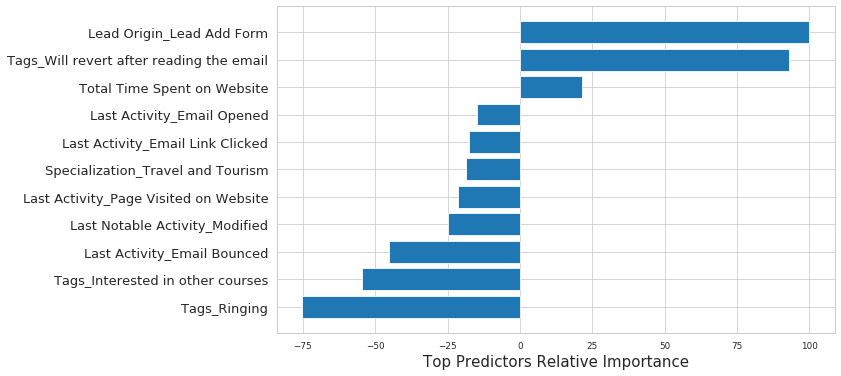

In [586]:
# Plotting the predictors based on their relative importance

%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5
fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col4].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

**Conclusion Summary**<BR>

~84% of Recall value means that our model is able to predict 84% of actual conversion cases correctly.<BR>
~85% of Precision value indicates that 85% of the conversions that our model predicted is actually converted.<BR>

Top 3 features/dummy variables that contribute towards lead conversion(Hot leads) in this model are:<BR>
- Lead Origin_Lead Add Form 
- Tags_Will revert after reading the email
- Total time Spent on Website
<BR>

Top 3 variables in this model, that should be focused are:<BR>
- Tags_Ringing
- Last Activity_Email Link Clicked
- Tags_Will revert after reading the email
  Though these variables are listed in top predictors, they are negatively impacting
<BR> 
   
    
Recommendations:<BR>
X Education Company needs to focus on following key aspects to improve the overall conversion rate:<BR>
- Increase user engagement on their website since this helps in higher conversion
- Increase on sending email notifications since this helps in higher conversion
- Get TotalVisits increased by advertising etc. since this helps in higher conversion
- Improve the phone service since this is affecting the conversion negatively.Focus on email response and follow up on the same helps to reduce the negative impact.<BR>